In [1]:
import numpy as np
import copy
from matplotlib import pyplot as plt
from matplotlib import animation

%matplotlib inline

plt.rcParams["animation.html"] = "jshtml"

# data

In [2]:
training_set = [
    {"point": [3, 3], "label": 1},
    {"point": [4, 3], "label": 1},
    {"point": [1, 1], "label": -1}
]
hyperplane = {"normal_vector": [0, 0], "intercept": 0}
learning_rate = 1
history = []

# train

In [3]:
def isWrongSeperatedPoint(item):
    # https://github.com/hsiehpinghan/example/blob/master/formula-example/notebook/linear_algebra/point_to_hyperplane_distance.ipynb
    return item["label"] * (np.dot(hyperplane["normal_vector"], item["point"]) + hyperplane["intercept"]) <= 0

def modifyHyperplane(item):
    hyperplane["normal_vector"][0] += learning_rate * item["label"] * item["point"][0]
    hyperplane["normal_vector"][1] += learning_rate * item["label"] * item["point"][1]
    hyperplane["intercept"] += learning_rate * item["label"]

def train():
    while(True):
        hasAnyWrongSeperatedPoint = False
        for item in training_set:
            if(isWrongSeperatedPoint(item) == True):
                hasAnyWrongSeperatedPoint = True
                modifyHyperplane(item)
                history.append([copy.copy(hyperplane)])
        if hasAnyWrongSeperatedPoint == False:
            break;

train()
print(history)

[[{'normal_vector': [1, 1], 'intercept': 1}], [{'normal_vector': [1, 1], 'intercept': 0}], [{'normal_vector': [1, 1], 'intercept': -1}], [{'normal_vector': [1, 1], 'intercept': -2}], [{'normal_vector': [1, 1], 'intercept': -1}], [{'normal_vector': [1, 1], 'intercept': -2}], [{'normal_vector': [1, 1], 'intercept': -3}]]


# animation

TypeError: list indices must be integers or slices, not str

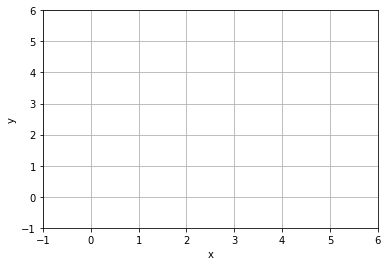

In [13]:
def init_func():
    plt.axis([-1, 6, -1, 6])
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    for item in training_set:
        if(item["label"] == 1):
            plt.plot(item["point"][0], item["point"][1], 'go')
        else:
            plt.plot(item["point"][1], item["point"][1], 'rx')

def animate(i):
    hyperplane = history[i]
    x1 = -2
    y1 = np.dot(hyperplane["normal_vector"][0], x1) + hyperplane["intercept"]
    ??x2 = -2
    ??y2 = np.dot(hyperplane["normal_vector"][0], x1) + hyperplane["intercept"]
    
    w = history[i][0]
    b = history[i][1]
    if w[1] == 0: return line, label
    x1 = -7
    y1 = -(b + w[0] * x1) / w[1]
    x2 = 7
    y2 = -(b + w[0] * x2) / w[1]

    print([x1, x2], [y1, y2])

    line.set_data([x1, x2], [y1, y2])
    x1 = 0
    y1 = -(b + w[0] * x1) / w[1]
    label.set_text(history[i])
    label.set_position([x1, y1])
    return line, label
            
animation.FuncAnimation(fig=fig, func=animate, frames=len(history), init_func=init_func)

In [10]:
def init():
    line.set_data([], [])
    x, y, x_, y_ = [], [], [], []
    for p in training_set:
        if p[1] > 0:
            x.append(p[0][0])
            y.append(p[0][1])
        else:
            x_.append(p[0][0])
            y_.append(p[0][1])

    plt.plot(x, y, 'bo', x_, y_, 'rx')
    plt.axis([-6, 6, -6, 6])
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Perceptron Algorithm (www.hankcs.com)')
    return line, label

def animate(i):
    global history, ax, line, label

    w = history[i][0]
    b = history[i][1]
    if w[1] == 0: return line, label
    x1 = -7
    y1 = -(b + w[0] * x1) / w[1]
    x2 = 7
    y2 = -(b + w[0] * x2) / w[1]

    print([x1, x2], [y1, y2])

    line.set_data([x1, x2], [y1, y2])
    x1 = 0
    y1 = -(b + w[0] * x1) / w[1]
    label.set_text(history[i])
    label.set_position([x1, y1])
    return line, label

#animation.FuncAnimation(fig=fig, func=animate, frames=len(history), init_func=init_func)
animation.FuncAnimation(fig=fig, func=None, frames=1, init_func=init_func)

NameError: name 'fig' is not defined

[3, 3] 1
[2, 2] 0
[1, 1] -1
[0, 0] -2
[3, 3] -1
[2, 2] -2
[1, 1] -3
RESULT: w: [1, 1] b: -3
[[[3, 3], 1], [[2, 2], 0], [[1, 1], -1], [[0, 0], -2], [[3, 3], -1], [[2, 2], -2], [[1, 1], -3]]
[-7, 7] [6.666666666666667, -7.333333333333333]
[-7, 7] [7.0, -7.0]
[-7, 7] [8.0, -6.0]
[-7, 7] [7.333333333333333, -6.666666666666667]
[-7, 7] [8.0, -6.0]
[-7, 7] [10.0, -4.0]


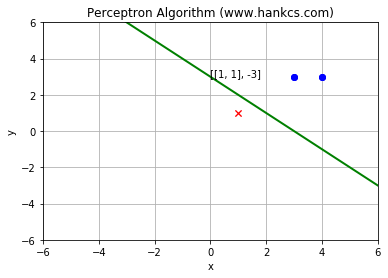

In [11]:
training_set = [[(3, 3), 1], [(4, 3), 1], [(1, 1), -1]]
w = [0, 0]
b = 0
history = []

def update(item):
    """
    update parameters using stochastic gradient descent
    :param item: an item which is classified into wrong class
    :return: nothing
    """
    global w, b, history
    w[0] += 1 * item[1] * item[0][0]
    w[1] += 1 * item[1] * item[0][1]
    b += 1 * item[1]
    print(w, b)
    history.append([copy.copy(w), b])
    # you can uncomment this line to check the process of stochastic gradient descent
 
 
def cal(item):
    """
    calculate the functional distance between 'item' an the dicision surface. output yi(w*xi+b).
    :param item:
    :return:
    """
    res = 0
    for i in range(len(item[0])):
        res += item[0][i] * w[i]
    res += b
    res *= item[1]
    return res


def check():
    """
    check if the hyperplane can classify the examples correctly
    :return: true if it can
    """
    flag = False
    for item in training_set:
        if cal(item) <= 0:
            flag = True
            update(item)
    # draw a graph to show the process
    if not flag:
        print("RESULT: w: " + str(w) + " b: " + str(b))
    return flag


for i in range(1000):
    if not check(): break

# first set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], 'g', lw=2)
label = ax.text([], [], '')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    x, y, x_, y_ = [], [], [], []
    for p in training_set:
        if p[1] > 0:
            x.append(p[0][0])
            y.append(p[0][1])
        else:
            x_.append(p[0][0])
            y_.append(p[0][1])

    plt.plot(x, y, 'bo', x_, y_, 'rx')
    plt.axis([-6, 6, -6, 6])
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Perceptron Algorithm (www.hankcs.com)')
    return line, label


# animation function.  this is called sequentially
def animate(i):
    global history, ax, line, label

    w = history[i][0]
    b = history[i][1]
    if w[1] == 0: return line, label
    x1 = -7
    y1 = -(b + w[0] * x1) / w[1]
    x2 = 7
    y2 = -(b + w[0] * x2) / w[1]

    print([x1, x2], [y1, y2])

    line.set_data([x1, x2], [y1, y2])
    x1 = 0
    y1 = -(b + w[0] * x1) / w[1]
    label.set_text(history[i])
    label.set_position([x1, y1])
    return line, label

# call the animator.  blit=true means only re-draw the parts that have changed.
print(history)
#pdb.set_trace()
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(history), interval=1000, repeat=True, blit=True)

#anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(history))
anim

#plt.show()
#anim.save('perceptron.gif', fps=2, writer='imagemagick')